# Tema 2
## Topics de interés en la web de GitHub
Angular

In [1]:
from datetime import datetime,timedelta
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs, BeautifulSoup
from selenium import webdriver
import time
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

In [2]:
chrome ="/usr/lib/chromium-browser/chromedriver"
path = (chrome)
s = Service(path)
driver = webdriver.Chrome(service=s)

url_base = "https://github.com/topics/angular"
page = requests.get(url_base)
driver.get(url_base)

lista_topics_f = list()
lista_topics = list()
lista_fecha = list()

for i in range(10):
    driver.find_element(By.CSS_SELECTOR, ".ajax-pagination-btn").click()
    time.sleep(1)
soup = BeautifulSoup(driver.page_source, 'html.parser')
driver.quit()

In [3]:

topics_sinfiltrar = list()
# Se busca el primer div que contiene a los topics
for element in soup.findAll('div', attrs={'class':'d-flex flex-wrap border-bottom color-border-muted px-3 pt-2 pb-2'}):
    topics_sinfiltrar.append((element.text.split()))



# etiqueta li que contiene a la fecha de cada topic
fecha_li = soup.select('li.mr-4 > relative-time')

# Se guardata todas las fechas encontradas
for index,i in enumerate(fecha_li):
    lista_fecha.append(i.attrs['datetime'])

# Fecha actual
current_time = datetime.now()
now = datetime.now().strftime("%Y-%m-%dT%H:%M:%SZ")
fecha_actual = datetime.strptime(now,"%Y-%m-%dT%H:%M:%SZ")

contador=0

# Se calcula que la fecha no sea superiro a 30 dias
for i in lista_fecha:
    fecha_del_topic = datetime.strptime(lista_fecha[contador], "%Y-%m-%dT%H:%M:%SZ")
    diferencia = fecha_actual - fecha_del_topic
    if (diferencia.days < 30):
        lista_topics.append(topics_sinfiltrar[contador])
    contador = contador + 1
contador=0

# Se guarda en una nueva lista los topics ya procesados con las restricción de fecha
while contador < len(lista_topics):
    for x in  lista_topics[contador]:
        lista_topics_f.append(x)
    contador += 1

# Se guarda los datos en un .cvs
df =pd.DataFrame({'Topic':lista_topics_f} )
nro_apariciones = dict((i, lista_topics_f.count(i)) for i in lista_topics_f)
df.to_csv('Respuesta.csv')

df = pd.DataFrame([[key, nro_apariciones[key]] for key in nro_apariciones.keys()], columns=['Topic', 'Repeticiones'])
df_topics_descendente = df.sort_values(by=['Repeticiones'],ascending=False)
print(df_topics_descendente)





                Topic  Repeticiones
3             angular            89
0               react            36
6          typescript            31
1          javascript            29
10                vue            23
..                ...           ...
273      music-player             1
272   angular-routing             1
271        hot-reload             1
270  native-libraries             1
596  shopping-website             1

[597 rows x 2 columns]


# Grafico en barras
Se visualizan las 20 palabras con mayor número de apariciones en orden descendente

<AxesSubplot:title={'center':'Lista de topics'}, xlabel='Topic'>

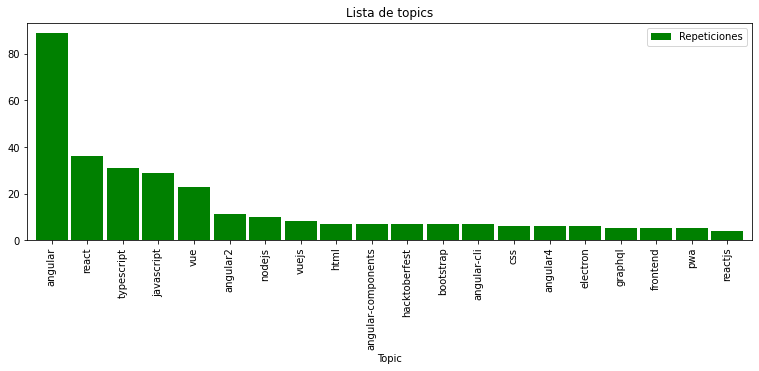

In [4]:
grafico = df_topics_descendente[:20].copy()
grafico.plot.bar(x='Topic', y='Repeticiones' ,title='Lista de topics', color='green',width = 0.9 ,figsize=(13,4))